In [1]:
import xml.etree.ElementTree as ET
import nltk
from nltk.parse.corenlp import CoreNLPDependencyParser

import os
import sys
import re

In [2]:
def analyze(s):
    mytree = my_parser.raw_parse(s)
    last_offset_end = 0
    for head_node in mytree:
        print(list(head_node.nodes.viewkeys())[1:])
        for key in sorted(head_node.nodes, key=lambda key: int(key)):
            # first key is not first word (is root)
            if key == 0:
                continue
            # find first occurrence of substring token in sentence
            word = head_node.nodes[key]['word']
            offset_start = s.find(word, last_offset_end)
            offset_end = offset_start + len(word) - 1  # -1 as length 1 is same start and end
            # store last offsets
            last_offset_end = offset_end
            # add start and end to the token
            head_node.nodes[key]['start'] = offset_start
            head_node.nodes[key]['end'] = offset_end

    return head_node


In [3]:
class Entity:                                                                                                                                                                           
                                                                                                                                                                                         
    def __init__(self, **kwargs):                                                                                                                                                       
        self.word = kwargs["text"]                                                                                                                                                      
        self.offset_from, self.offset_to = self.parse_offset(kwargs["charOffset"])                                                                                                      
        self.id = kwargs["id"]                                                                                                                                                          

    def parse_offset(self, offset):                                                                                                                                                     

        # offset can be given in two ways                                                                                                                                               
        # e.g.:                                                                                                                                                                         
        #       * 9-23                                                                                                                                                                  
        #       * 9-11;12-20;21-23                                                                                                                                                      
        #                                                                                                                                                                               
        # We differenciate both cases and always save the first one and the last one                                                                                                    

        if ";" in offset:                                                                                                                                                               
            offset = offset.split(";")                                                                                                                                                  
            offset_from = offset[0].split('-')[0]                                                                                                                                       
            offset_to = offset[-1].split('-')[1]                                                                                                                                        
        else:                                                                                                                                                                           
            offset_from, offset_to = offset.split('-')                                                                                                                                  

        return int(offset_from), int(offset_to) 

In [4]:
my_parser = CoreNLPDependencyParser(url="http://localhost:9000")

In [5]:
s = "Hola que tal estas resorcinol."
e1 = "resorcinol"
e2 = "salicylic acid"
entities = [Entity(**{"text": e1, "charOffset": "21-30", "id": "DDI-DrugBank.d200.s0.e0"}), Entity(**{"text": e2, "charOffset": "37-45", "id": "DDI-DrugBank.d200.s0.e1"})]

In [20]:
def get_subtree_from_word(tree, ent):                                                                                                                

# Get the first word if there are more than one                                                                                                  
    for word in ent.split():                                                                                                                         
        entity_subtree =  list(tree.subtrees(filter=lambda t: t.label() == word))                                                                    
        if entity_subtree != []:                                                                                                                                  
            return entity_subtree[0]                                                                                                                 

    return []

In [62]:
analisis = analyze("Caution should be exercised when combining resorcinol or salicylic acid with DIFFERIN Gel")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [67]:
"hola que".split()

['hola', 'que']

In [69]:
analisis = analyze("Drugs That Should Not Be Coadministered With VIRACEPT Antiarrhythmics: amiodarone, quinidine            Antihistamines: astemizole, terfenadine Antimigraine: ergot derivatives Antimycobacterial agents: rifampin Benzodiazepines midazolam, triazolam GI    motility agents: cisapride")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [ ]:
tree.

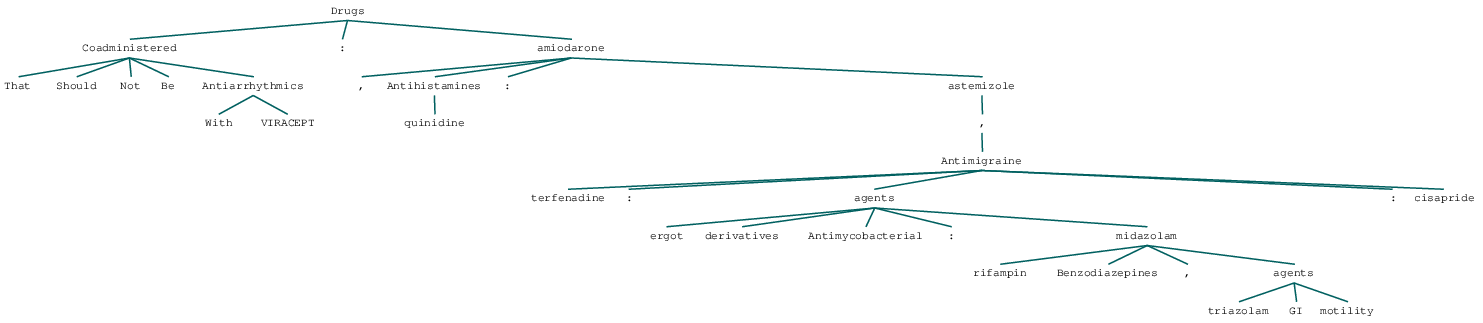

In [70]:
analisis.tree()

In [63]:
for gov, dep, bla in analisis.triples():
    print(gov, dep, bla)

((u'exercised', u'VBN'), u'nsubjpass', (u'Caution', u'NN'))
((u'exercised', u'VBN'), u'aux', (u'should', u'MD'))
((u'exercised', u'VBN'), u'auxpass', (u'be', u'VB'))
((u'exercised', u'VBN'), u'advcl', (u'combining', u'VBG'))
((u'combining', u'VBG'), u'advmod', (u'when', u'WRB'))
((u'combining', u'VBG'), u'dobj', (u'resorcinol', u'NN'))
((u'resorcinol', u'NN'), u'cc', (u'or', u'CC'))
((u'resorcinol', u'NN'), u'conj', (u'acid', u'NN'))
((u'acid', u'NN'), u'amod', (u'salicylic', u'JJ'))
((u'combining', u'VBG'), u'nmod', (u'Gel', u'NN'))
((u'Gel', u'NN'), u'case', (u'with', u'IN'))
((u'Gel', u'NN'), u'compound', (u'DIFFERIN', u'NNP'))


In [30]:
e1_tree = get_subtree_from_word(tree, "resorcinol")

In [47]:
e1_node = analisis.nodes[2]

In [48]:
e1_node

{u'address': 2,
 u'ctag': u'NN',
 u'deps': defaultdict(list, {u'compound': [1], u'dep': [5], u'punct': [6]}),
 'end': 7,
 u'feats': u'_',
 u'head': 0,
 u'lemma': u'que',
 u'rel': u'ROOT',
 'start': 5,
 u'tag': u'NN',
 u'word': u'que'}

In [34]:
e1_tree.label()

u'resorcinol'

In [36]:
help(e1_tree.)

Help on method convert in module nltk.tree:

convert(cls, tree) method of __builtin__.type instance
    Convert a tree between different subtypes of Tree.  ``cls`` determines
    which class will be used to encode the new tree.
    
    :type tree: Tree
    :param tree: The tree that should be converted.
    :return: The new Tree.



In [11]:
analisis = analyze(s)

[1, 2, 3, 4, 5, 6]


In [12]:
tree = analisis.tree()

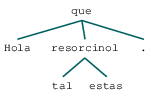

In [15]:
tree

In [14]:
for a in analisis.triples():
    print(a)

((u'que', u'NN'), u'compound', (u'Hola', u'NNP'))
((u'que', u'NN'), u'dep', (u'resorcinol', u'FW'))
((u'resorcinol', u'FW'), u'amod', (u'tal', u'JJ'))
((u'resorcinol', u'FW'), u'compound', (u'estas', u'FW'))
((u'que', u'NN'), u'punct', (u'.', u'.'))


In [116]:
analysis = analyze(s)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [117]:
tree= analysis.tree()

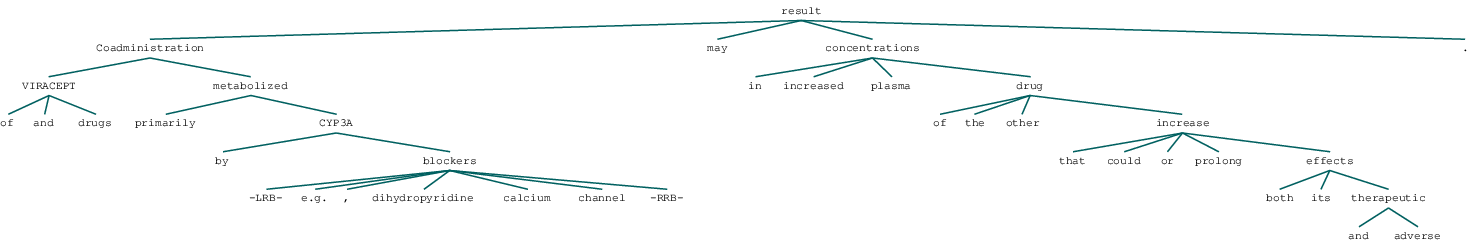

In [126]:
tree

In [123]:
a = get_subtree_from_word(tree, "dihydropyridine")

In [125]:
a

[]

In [124]:
type(a)

list

In [122]:
def get_subtree_from_word(tree, word):
    return list(tree.subtrees(filter=lambda t: t.label() == word))

In [93]:
analysis

Exception: Cannot find the dot binary from Graphviz package

<DependencyGraph with 14 nodes>

In [66]:
e1_tree = get_subtree_from_word(tree, e1)

In [87]:
s = "hola que bla bla bla bla ble lbe lb tal que estas caca pedo"

In [89]:
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

In [91]:
find_between(s, "tal", "caca")

' que estas '

In [88]:
s.partition(e1)

('hola que bla bla bla bla ble lbe lb ', 'tal', ' que estas caca pedo')

In [86]:
help(s.center)

Help on built-in function center:

center(...)
    S.center(width[, fillchar]) -> string
    
    Return S centered in a string of length width. Padding is
    done using the specified fill character (default is a space)



In [78]:
help(s.partition)

Help on built-in function partition:

partition(...)
    S.partition(sep) -> (head, sep, tail)
    
    Search for the separator sep in S, and return the part before it,
    the separator itself, and the part after it.  If the separator is not
    found, return S and two empty strings.



In [75]:
help(str.find)

Help on method_descriptor:

find(...)
    S.find(sub [,start [,end]]) -> int
    
    Return the lowest index in S where substring sub is found,
    such that sub is contained within S[start:end].  Optional
    arguments start and end are interpreted as in slice notation.
    
    Return -1 on failure.



In [72]:
s.find("hola") < s.find(e1)

True

In [71]:
e2_tree

[]

In [54]:
type(e1_tree)

nltk.tree.Tree

In [58]:
is_node_in_parent(e2_tree, "acid")

True

In [36]:
tree.subtrees(filter=lambda t: t.label()=="resorcinol")


[Tree('resorcinol', ['or', Tree('acid', ['salicylic'])])]

In [28]:
for subtree in tree.subtrees():
    a

(exercised
  Caution
  should
  be
  (combining
    when
    (resorcinol or (acid salicylic))
    (Gel with DIFFERIN)))
(combining when (resorcinol or (acid salicylic)) (Gel with DIFFERIN))
(resorcinol or (acid salicylic))
(acid salicylic)
(Gel with DIFFERIN)


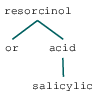

In [59]:
e2_tree

In [50]:
 # Returns the key corresponding to the entity in the analysis dependency graph                                                                                                          
def get_entity_node_key(entity, analysis):                                                                                                                                              
    for key in list(analysis.nodes.keys())[1:]:                                                                                                                                        
        if analysis.nodes[key]['start'] == int(entity[0]):                                                                                                                              
            return key                                                                                                                                                                  
                                                                                                                                                                                         
    return 0                                                                                                                                                                            
                                                                                                                                                                                         
 # Checks if the input word (belonging to a node) is a parent of the input parent                                                                                                        
 #       NOM EN MINUSCULA                                                                                                                                                                
def is_node_in_parent(parent, word):                                                                                                                                                    
    for node in parent:                                                                                                                                                                 
        if type(node) is nltk.Tree:                                                                                                                                                     
            if node.label() == word:                                                                                                                                                    
                return True                                                                                                                                                             
            if is_node_in_parent(node, word):                                                                                                                                              
                return True                                                                                                                                                             
        else:                                                                                                                                                                           
            if node == word:                                                                                                                                                            
                 return True                                                                                                                                                             
    return False                          

In [ ]:
is_node_in_parent()